In [76]:
## ************ Importing Libraries ******************
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning
from sklearn import metrics ## different metrics that we are going to take into consideration while evaluating our model 
import joblib  ## for saving our models as .pkl files to use them in our web application 
from sklearn.metrics import plot_confusion_matrix ## to evaluate the quality of our models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [77]:
#lecture du dataset en dataframe
df = pd.read_csv('dataset_classification.csv')
df=df.drop(df.columns[0], axis=1)
df= df[['absences', 'G1', 'failures', 'pass', 'Walc', 'schoolsup','reason', 'Fjob','studytime','traveltime', 'Mjob', 'paid', 'Medu','guardian', 'goout', 'Fedu']]

In [78]:
X= df.drop(["pass"], axis=1) # our features
y= df["pass"] # our target 

In [79]:
X

,absences,G1,failures,Walc,schoolsup,reason,Fjob,studytime,traveltime,Mjob,paid,Medu,guardian,goout,Fedu
0,6,5,0,1,1,0,2,2,2,0,0,4,0,4,4
1,4,5,0,1,0,0,4,2,1,0,0,1,1,3,1
2,10,7,3,3,1,3,4,2,1,0,1,1,0,2,1
3,2,15,0,1,0,1,1,3,1,3,1,4,0,2,2
4,4,6,0,2,0,1,4,2,1,4,1,3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,11,9,2,5,0,0,1,2,1,1,1,2,2,4,2
391,3,14,0,4,0,0,1,1,2,1,0,3,0,5,1
392,3,10,3,3,0,0,4,1,1,4,0,1,2,3,1
393,0,11,0,4,0,0,4,1,3,1,0,3,0,1,2


In [80]:
y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: pass, Length: 395, dtype: int64

In [81]:
# correlation matrix  
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\mokht\AppData\Local\Temp\ipykernel_4904\2771999493.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,absences,G1,failures,pass,Walc,schoolsup,reason,Fjob,studytime,traveltime,Mjob,paid,Medu,guardian,goout,Fedu
absences,1.00,-0.03,0.06,-0.09,0.14,0.02,0.11,0.02,-0.06,-0.01,0.04,0.01,0.10,0.04,0.04,0.02
G1,-0.03,1.00,-0.35,0.66,-0.13,-0.21,0.07,-0.08,0.16,-0.09,-0.08,0.04,0.21,-0.00,-0.15,0.19
failures,0.06,-0.35,1.00,-0.34,0.14,-0.00,-0.05,-0.06,-0.17,0.09,-0.06,-0.19,-0.24,0.22,0.12,-0.25
pass,-0.09,0.66,-0.34,1.00,-0.03,-0.10,0.11,0.04,0.07,-0.04,-0.03,0.09,0.12,-0.05,-0.18,0.11
Walc,0.14,-0.13,0.14,-0.03,1.00,-0.09,0.01,0.03,-0.25,0.13,-0.02,0.06,-0.05,-0.02,0.42,-0.01
schoolsup,0.02,-0.21,-0.00,-0.10,-0.09,1.00,0.01,-0.01,0.04,-0.01,-0.01,-0.02,-0.04,-0.02,-0.04,0.04
reason,0.11,0.07,-0.05,0.11,0.01,0.01,1.00,-0.02,0.06,-0.07,0.05,0.15,0.10,0.03,-0.05,0.03
Fjob,0.02,-0.08,-0.06,0.04,0.03,-0.01,-0.02,1.00,-0.02,0.08,0.23,0.03,-0.03,-0.10,0.05,-0.14
studytime,-0.06,0.16,-0.17,0.07,-0.25,0.04,0.06,-0.02,1.00,-0.10,-0.02,0.17,0.06,0.03,-0.06,-0.01
traveltime,-0.01,-0.09,0.09,-0.04,0.13,-0.01,-0.07,0.08,-0.10,1.00,-0.05,-0.07,-0.17,0.06,0.03,-0.16


In [82]:
X = X.drop(['Medu','Walc','Fjob'],axis=1)

In [83]:
X

,absences,G1,failures,schoolsup,reason,studytime,traveltime,Mjob,paid,guardian,goout,Fedu
0,6,5,0,1,0,2,2,0,0,0,4,4
1,4,5,0,0,0,2,1,0,0,1,3,1
2,10,7,3,1,3,2,1,0,1,0,2,1
3,2,15,0,0,1,3,1,3,1,0,2,2
4,4,6,0,0,1,2,1,4,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
390,11,9,2,0,0,2,1,1,1,2,4,2
391,3,14,0,0,0,1,2,1,0,0,5,1
392,3,10,3,0,0,1,1,4,0,2,3,1
393,0,11,0,0,0,1,3,1,0,0,1,2


# Models Training

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

### Logistic Regression

In [85]:
logreg= LogisticRegression(C= 0.1, solver= 'newton-cg')
logreg.fit(X_train, y_train)
Y_pred_logreg= logreg.predict(X_test)
score_logreg = logreg.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_logreg))
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.87


0.8332051282051282

In [86]:
# saving the model 
file = "Models/logistic_reg.pkl"
joblib.dump(logreg, file)

['Models/logistic_reg.pkl']

### Random Forest Algorithm

In [87]:
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)
score_forest = forest.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_forest))
cross_val_score(forest, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.80


0.8433974358974359

In [88]:
# saving the model 
file = "Models/random_forest.pkl"
joblib.dump(forest, file)

['Models/random_forest.pkl']

### K Nearest Neighbours Algorithm (KNN)

In [89]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
score_knn = knn.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_knn))
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.85


0.8308333333333333

In [90]:
file = "Models/knn.pkl"
joblib.dump(knn, file)

['Models/knn.pkl']

### Gradient Boosting Classifier

In [91]:
gradient = GradientBoostingClassifier(learning_rate = 0.025, max_depth = 3)
gradient.fit(X_train, y_train)
Y_pred_gradient = gradient.predict(X_test)
score_gradient =gradient.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_gradient))
cross_val_score(gradient, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.85


0.8307692307692307

In [92]:
file = "Models/gradient_boosting.pkl"
joblib.dump(gradient, file)

['Models/gradient_boosting.pkl']

### Decision Tree

In [93]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_decision = decision.predict(X_test)
score_decision = decision.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_decision))
cross_val_score(decision, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.81


0.7878205128205128

In [94]:
file = "Models/decision_tree.pkl"
joblib.dump(decision, file)


['Models/decision_tree.pkl']

### Naive Bayes

In [95]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
score_nb = nb.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_nb))
cross_val_score(nb, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.78


0.8154487179487179

In [96]:
file = "Models/naive_bayes.pkl"
joblib.dump(nb, file)


['Models/naive_bayes.pkl']

### Support Vector Machine

In [97]:
sv = SVC(C= 100, gamma = 0.0001, kernel = 'rbf')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)
score_sv = sv.score(X_test, y_test)
print("Accuracy = {:.2f}".format(score_sv))
cross_val_score(sv, X, y, cv=10, scoring='accuracy').mean()

Accuracy = 0.89


0.8308333333333333

In [98]:
file = "Models/svm.pkl"
joblib.dump(sv, file)


['Models/svm.pkl']

# Models Evaluation

In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Gradient Boosting',
              'K - Nearest Neighbors'],
    'Score': [score_logreg, score_nb , score_decision, score_forest, score_sv, score_gradient, score_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,0.886076
0,Logistic Regression,0.873418
5,Gradient Boosting,0.848101
6,K - Nearest Neighbors,0.848101
2,Decision Tree,0.810127
3,Random Forest,0.797468
1,Naive Bayes,0.784810


# Hyper Parameter Tuning

#### 1 - Logistic Regression

In [100]:
# we choose values for different parameters of the algorithm
solvers = ['newton-cg', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# we create a grid of these parameters ( combination of different values of these parameters) 
param_grids = dict(solver=solvers,C=c_values)
print(param_grids)
#instantiate the grid
grids = GridSearchCV(logreg, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
# for each parameter combination, display the score 
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


{'solver': ['newton-cg', 'liblinear'], 'C': [100, 10, 1.0, 0.1, 0.01]}


,mean_test_score,std_test_score,params
0,0.823269,0.067178,"{'C': 100, 'solver': 'newton-cg'}"
1,0.825833,0.068479,"{'C': 100, 'solver': 'liblinear'}"
2,0.820769,0.064695,"{'C': 10, 'solver': 'newton-cg'}"
3,0.818205,0.068750,"{'C': 10, 'solver': 'liblinear'}"
4,0.825769,0.056593,"{'C': 1.0, 'solver': 'newton-cg'}"
5,0.818077,0.069784,"{'C': 1.0, 'solver': 'liblinear'}"
6,0.833205,0.044366,"{'C': 0.1, 'solver': 'newton-cg'}"
7,0.807821,0.054508,"{'C': 0.1, 'solver': 'liblinear'}"
8,0.835705,0.049901,"{'C': 0.01, 'solver': 'newton-cg'}"
9,0.805256,0.060189,"{'C': 0.01, 'solver': 'liblinear'}"


#### 2 - KNN

In [101]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grids = dict(n_neighbors=k_range, weights=weight_options)
print(param_grids)
grids = GridSearchCV(knn, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mokht\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,mean_test_score,std_test_score,params
0,0.805641,0.079096,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.805641,0.079096,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.790705,0.080219,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.803077,0.082250,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.830962,0.057263,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.830962,0.057263,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.825833,0.063074,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.823333,0.059160,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.840962,0.055550,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.838462,0.057852,"{'n_neighbors': 5, 'weights': 'distance'}"


#### 3 - Random Forest

In [102]:
estimators=[2,5,10,20]
param_grids = dict(n_estimators=estimators)
print(param_grids)
grids = GridSearchCV(forest, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


{'n_estimators': [2, 5, 10, 20]}


,mean_test_score,std_test_score,params
0,0.734295,0.100898,{'n_estimators': 2}
1,0.810641,0.050108,{'n_estimators': 5}
2,0.815705,0.059315,{'n_estimators': 10}
3,0.828462,0.071927,{'n_estimators': 20}


#### 4 - SVM

In [103]:
Cs =  [1, 10, 100, 1000]  
kernels= ['linear','rbf']
gammas= [0.001, 0.0001]
param_grids = dict(C=Cs,kernel=kernels,gamma=gammas)
print(param_grids)
grids = GridSearchCV(sv, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.0001]}


,mean_test_score,std_test_score,params
0,0.818205,0.067930,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}"
1,0.838205,0.041669,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}"
2,0.818205,0.067930,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}"
3,0.670833,0.004167,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}"
4,0.820705,0.070390,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}"
5,0.845962,0.051173,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}"
6,0.820705,0.070390,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}"
7,0.838205,0.046019,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}"
8,0.820705,0.070390,"{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}"
9,0.838654,0.073623,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"


#### 5 - Gradient Boosting Classifier

In [104]:
learning_rate = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]
max_depth = [3,5,8]
param_grids = dict(learning_rate=learning_rate,max_depth=max_depth)
print(param_grids)
grids = GridSearchCV(gradient, param_grids, cv=10, scoring='accuracy')
grids.fit(X, y)
pd.DataFrame(grids.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


{'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2], 'max_depth': [3, 5, 8]}


,mean_test_score,std_test_score,params
0,0.835705,0.065909,"{'learning_rate': 0.01, 'max_depth': 3}"
1,0.830897,0.071379,"{'learning_rate': 0.01, 'max_depth': 5}"
2,0.787821,0.066894,"{'learning_rate': 0.01, 'max_depth': 8}"
3,0.830769,0.068041,"{'learning_rate': 0.025, 'max_depth': 3}"
4,0.838718,0.072665,"{'learning_rate': 0.025, 'max_depth': 5}"
5,0.817885,0.051922,"{'learning_rate': 0.025, 'max_depth': 8}"
6,0.825962,0.085358,"{'learning_rate': 0.05, 'max_depth': 3}"
7,0.841154,0.068394,"{'learning_rate': 0.05, 'max_depth': 5}"
8,0.797756,0.063425,"{'learning_rate': 0.05, 'max_depth': 8}"
9,0.833718,0.090630,"{'learning_rate': 0.075, 'max_depth': 3}"


# Confusion Matrix 

#### 1 - Logistic Regression

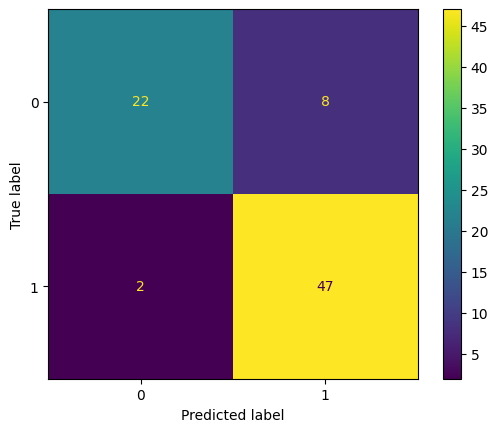

In [105]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show() 

#### 2 - Decision Tree

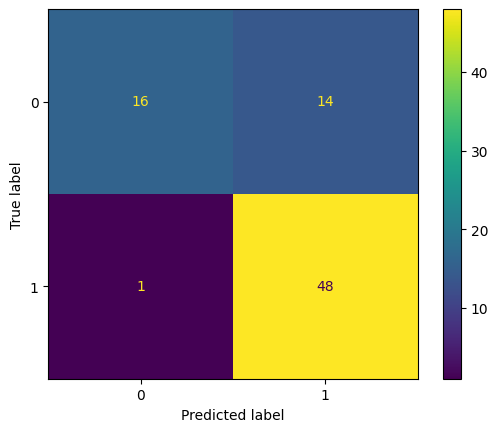

In [106]:
plot_confusion_matrix(decision, X_test, y_test)

#### 3 - Random Forest

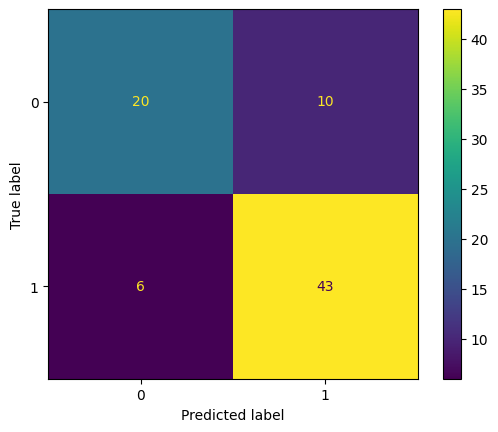

In [107]:
plot_confusion_matrix(forest, X_test, y_test)


#### 4 - KNN

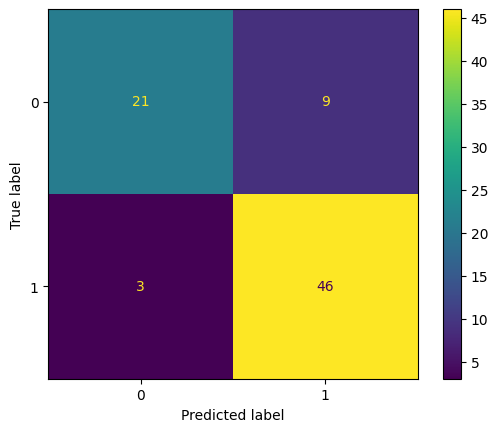

In [108]:
plot_confusion_matrix(knn, X_test, y_test)

#### 5 - Naive Bayes

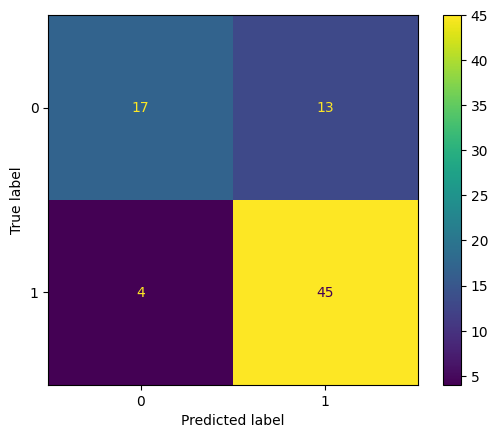

In [109]:
plot_confusion_matrix(nb, X_test, y_test)

#### 6 - SVM

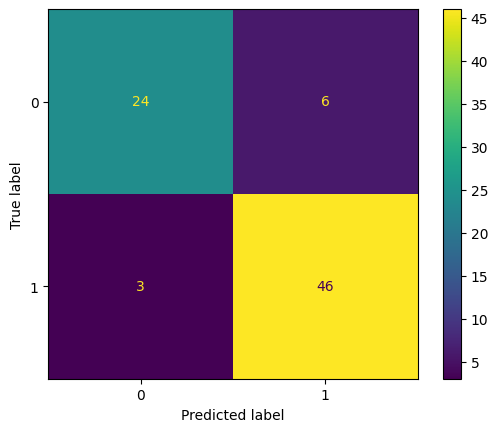

In [110]:
plot_confusion_matrix(sv, X_test, y_test)

#### 7 - Gradient Boosting Classifier

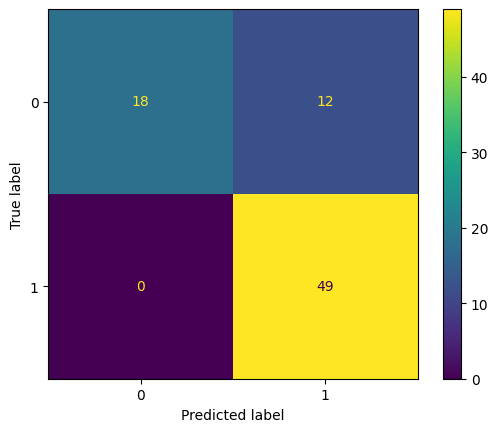

In [111]:
plot_confusion_matrix(gradient, X_test, y_test)